In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

applied_v = np.linspace(0, 1.6, 17)
current1 = [28.5, 16.5, 10., 5.5, 3.0, 1.5, 1.0, .5, 0, 0, 0, 0, 0]
current2 = [20., 11.5, 6.5, 3.5, 2., 1., .5, 0, 0, 0, 0]
current3 = [11., 10., 6., 3., 2., 1., 0.5, 0.5, 0, 0, 0, 0, 0, 0]
current4 = [22., 15., 10., 5., 2.5, 1., 0.5, 0, 0, 0, 0, 0]
current5 = [1.5, 1.0, .5, 0, 0, 0, 0, 0, 0]
current6 = [1., 1., 0, 0, 0, 0, 0]
current7 = [1., 0.5, 0, 0, 0, 0]

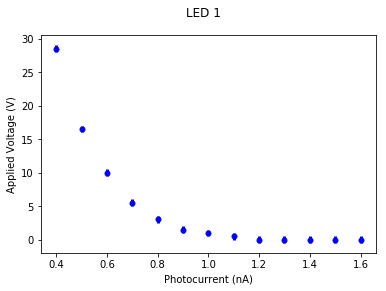

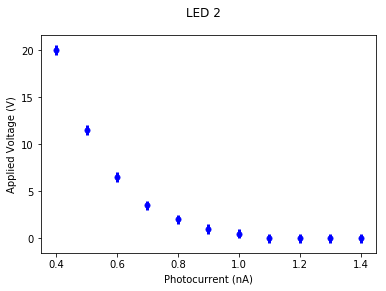

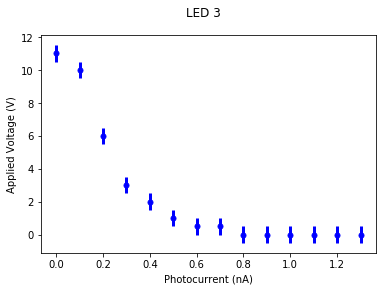

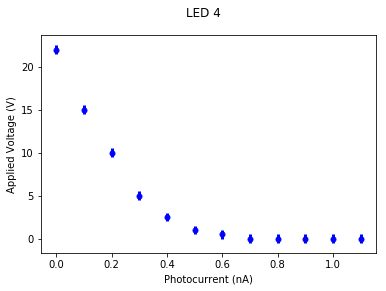

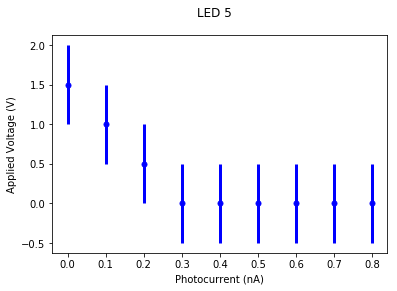

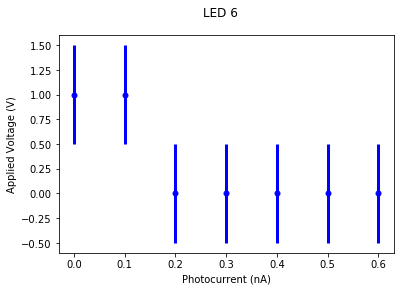

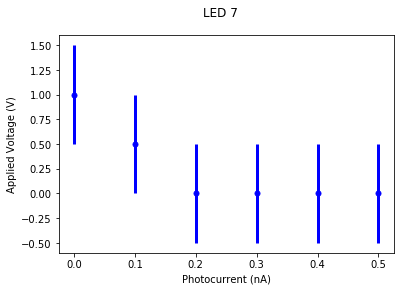

In [2]:
err = 0.5

plt.figure(1)
plt.errorbar(applied_v[4:], current1, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 1")
plt.savefig('current1.png')

plt.figure(2)
plt.errorbar(applied_v[4:15], current2, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 2")
plt.savefig('current2.png')

plt.figure(3)
plt.errorbar(applied_v[:14], current3, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 3")
plt.savefig('current3.png')

plt.figure(4)
plt.errorbar(applied_v[:12], current4, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 4")
plt.savefig('current4.png')

plt.figure(5)
plt.errorbar(applied_v[:9], current5, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 5")
plt.savefig('current5.png')

plt.figure(6)
plt.errorbar(applied_v[:7], current6, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 6")
plt.savefig('current6.png')

plt.figure(7)
plt.errorbar(applied_v[:6], current7, yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel("Photocurrent (nA)")
plt.ylabel("Applied Voltage (V)")
plt.suptitle("LED 7")
plt.savefig('current7.png')


# Calculating Errors

In [9]:
"""led_w stores the low, middle, and high wavelengths for each LED, where the i row stores the i LED's measurments, with 
i starting at 1.

led_v stores the stopping potential measurments for each led, where the i row stores the i LED's stopping potentials
"""

led_w = np.array([[430, 450, 510],
                  [440, 460, 530],
                  [480, 510, 560],
                  [500, 530, 570],
                  [560, 580, 610],
                  [590, 630, 640],
                  [620, 660, 670]])

led_v = np.array([[1.3511, 1.2456, 1.2353, 1.3727, 1.2314],
                 [1.1115, 1.0150, 1.1572, 1.1580, 1.1155],
                 [.9392, 1.1106, 1.0362, 1.0131, 1.1113],
                 [1.1086, .8363, .7711, .6712, .7046],
                 [.3602, .6097, .3728, .4074, .6248],
                 [.2274, .2694, .2101, .2547, .2908],
                 [.2059, .1719, .1674, .1941, .2060]])

stdw = np.std(led_w, axis = 1)
# #Converting from population standard deviation to sample standard deviation
# stdw **= 2
# stdw *= 3
# stdw *= 0.5
# stdw **= 0.5

stdv = np.std(led_v, axis = 1)
#Converting from population standard deviation to sample standard deviation
# stdv **= 2
# stdv *= 5
# stdv *= .25
# stdv **= 0.5

stdw, stdv, np.mean(led_w, axis = 1), np.mean(led_v, axis = 1) # led wavelength stdev, and stopping potential stdev, respectively

(array([33.99346342, 38.58612301, 32.99831646, 28.67441756, 20.54804668,
        21.60246899, 21.60246899]),
 array([0.06153254, 0.05211328, 0.06472265, 0.15581528, 0.11728407,
        0.02886073, 0.01648983]),
 array([463.33333333, 476.66666667, 516.66666667, 533.33333333,
        583.33333333, 620.        , 650.        ]),
 array([1.28722, 1.11144, 1.04208, 0.81836, 0.47498, 0.25048, 0.18906]))

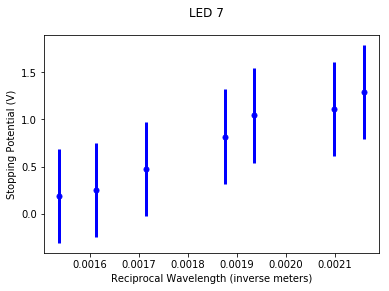

In [12]:
plt.figure(8)
plt.errorbar(1/np.mean(led_w, axis = 1), np.mean(led_v, axis = 1), yerr = err, fmt = "bo", markersize = "5", linewidth=3)
plt.ylabel("Stopping Potential (V)")
plt.xlabel("Reciprocal Wavelength (inverse meters)")
plt.suptitle("LED 7")
plt.savefig('current7.png')